<a href="https://colab.research.google.com/github/GIBSONGODSAN/MachineLearningAlgorithms/blob/main/DeepNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST - Deep Neural Network with Keras

Load the MNIST dataset: Load the dataset using Keras. The dataset consists of 60,000 training images and 10,000 testing images, each of size 28x28 pixels.

Preprocess the data: Reshape the images into a single vector of size 784 (28x28), scale the pixel values to be between 0 and 1, and one-hot encode the labels.

Define the model: Define a DNN model using Keras with several hidden layers and an output layer. The input layer should have 784 nodes (one for each pixel), and the output layer should have 10 nodes (one for each digit). Use an appropriate activation function such as ReLU or sigmoid for the hidden layers and softmax for the output layer.

Compile the model: Compile the model with an appropriate loss function such as categorical cross-entropy and an optimization algorithm such as Adam or SGD. Also, include metrics such as accuracy to monitor the performance during training.

Train the model: Train the model on the training set using the fit() method of the Keras model. Use an appropriate batch size and number of epochs. Also, include validation data to monitor the performance on a separate set of images during training.

Evaluate the model: Evaluate the model on the test set using the evaluate() method of the Keras model. This will give the overall accuracy of the model on the unseen test images.

Make predictions: Use the predict() method of the Keras model to make predictions on new images. The output will be a probability distribution over the 10 classes, and the predicted class can be obtained by taking the argmax of the output.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K



In [ ]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


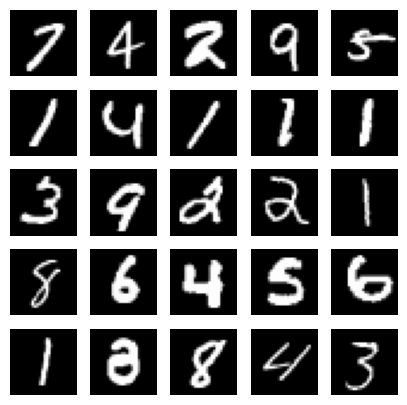

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [ ]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

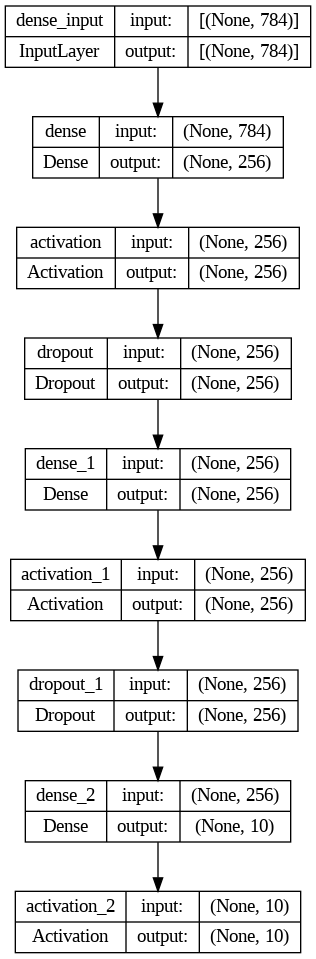

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
odel.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 0.4300 - accuracy: 0.8682
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1927 - accuracy: 0.9431
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1520 - accuracy: 0.9550
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1276 - accuracy: 0.9610
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1150 - accuracy: 0.9652
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1051 - accuracy: 0.9679
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0950 - accuracy: 0.9707
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0886 - accuracy: 0.9730
Epoch 9/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0819 - accuracy: 0.9745
Epoch 10/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0760 - accura

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 4ms/step - loss: 0.0665 - accuracy: 0.9811

Test accuracy: 98.1%


In [ ]:
from keras.regularizers import l2
model.add(Dense(hidden_units,
                kernel_regularizer=l2(0.001),
                input_dim=input_size))

In this kernel, I build a dense neural network model to classify the MNIST digits and predict accuracy.

We get the test accuracy of 98.3%.

The accuracy tells us that our ANN model classifies the digits 98.3% of time correctly.